In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [170]:
df = pd.read_csv("card_transdata.csv")

In [171]:
df2 = df.copy()

## About the Dataset


This dataset involves 1 million fraud and non-fraud credit card transactions. The goal of this study is to find the best fitting model to predict the fraud transactions based on their features.

**Features:**

distance_from_home: the distance from home where the transaction happened.

distance_from_last_transaction: the distance from last transaction happened.

ratio_to_median_purchase_price: Ratio of purchased price transaction to median purchase price.

repeat_retailer: Is the transaction happened from same retailer.

used_chip: Is the transaction through chip (credit card).

used_pin_number: Is the transaction happened by using PIN number.

online_order: Is the transaction an online order.

fraud: Is the transaction fraudulent.

In [172]:
print("Dataframe shape:", df2.shape)
df2

Dataframe shape: (1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [174]:
df2.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no missing values in the dataset.

In [175]:
df2.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [176]:
df2_log = df2.copy()

for column in [0, 1, 2]:
    df2_log.iloc[:, column] = np.log10(df2.iloc[:, column])

D:\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Desktop\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Desktop\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Desktop

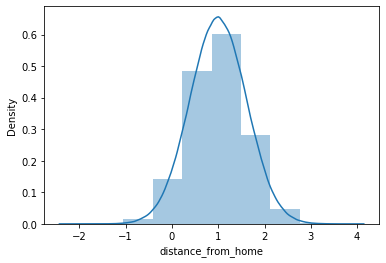

D:\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Desktop\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Desktop\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Desktop

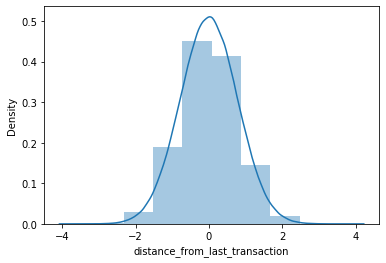

D:\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Desktop\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Desktop\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Desktop

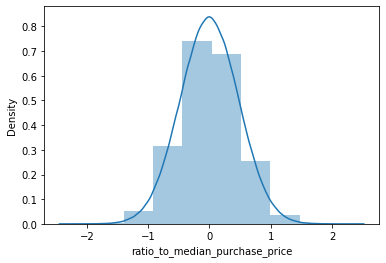

In [177]:
#!pip install -U seaborn
numerical_columns = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in numerical_columns:
    plt.figure()
    plot = df2_log[column]
    sns.distplot(plot, bins=10, kde=True)
    plt.show()

**Let's check if the distance and ratio columns have negative values.**

In [178]:
for column in numerical_columns:
    if len(df2[df2[column] < 0]) == 0:
        print(column, "has no negative values.")
    else:
        print(column, "has negative values.")

distance_from_home has no negative values.
distance_from_last_transaction has no negative values.
ratio_to_median_purchase_price has no negative values.


There are no duplicate values in the dataset

In [179]:
df2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
#Number of fraud transactions
df2[df2["fraud"] == 1].fraud.count()

87403

In [181]:
f_count = df2[df2["fraud"] == 1]["fraud"].count()
nf_count = df2[df2["fraud"] == 0]["fraud"].count()
print("Number of fraud transactions:", f_count)
print("Number of non-fraud transactions:", nf_count)
print("Fraud percent:", f_count / (f_count + nf_count) * 100)

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percent: 8.7403


<BarContainer object of 1 artists>

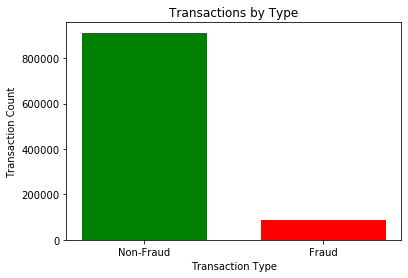

In [182]:
categories = ["Non-Fraud", "Fraud"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.title("Transactions by Type")
plt.bar(xpos[0], nf_count, width= 0.7, color = "g")
plt.bar(xpos[1], f_count, width = 0.7, color="r")

([<matplotlib.patches.Wedge at 0x2390aabe6d8>,
 [Text(-1.058791700494653, 0.29826185636725505, 'Non-Fraud'),
  Text(1.1550454914487123, -0.3253765705824602, 'Fraud')],
 [Text(-0.5775227457243561, 0.16268828529123003, '91.26%'),
  Text(0.6737765366784155, -0.1898029995064351, '8.74%')])

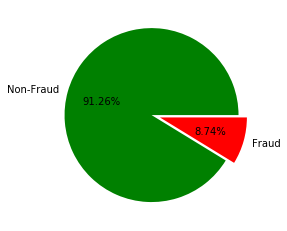

In [183]:
plt.pie(df2["fraud"].value_counts(), labels = categories, autopct = "%.2f%%", explode= (0, 0.1), colors = ("g", "r"))

**As it can be seen from the charts, number of fraud transactions are significantly low when compared to non-fraud transactions, which means the data is quite inbalance. We will inspect this issue later. First, let's take a further look at the fraud transactions.**

In [184]:
fraud_df = df2[df2["fraud"] == 1]

In [185]:
fraud_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


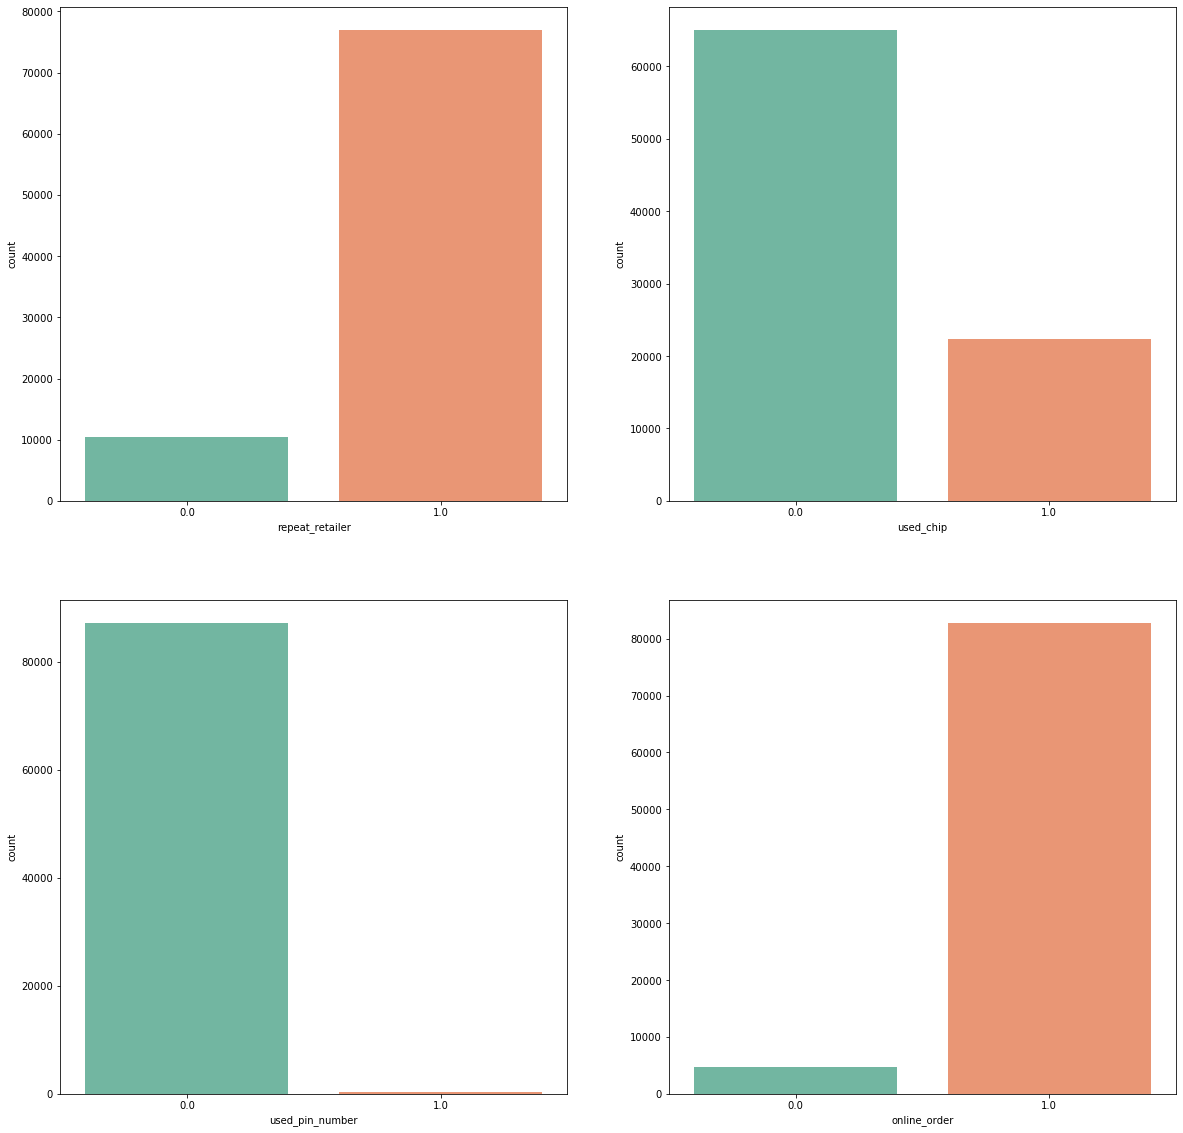

In [186]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Set2", data = fraud_df)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Set2", data = fraud_df)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Set2", data = fraud_df)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Set2", data = fraud_df)

Text(0.5, 1.0, 'Was the transaction online?')

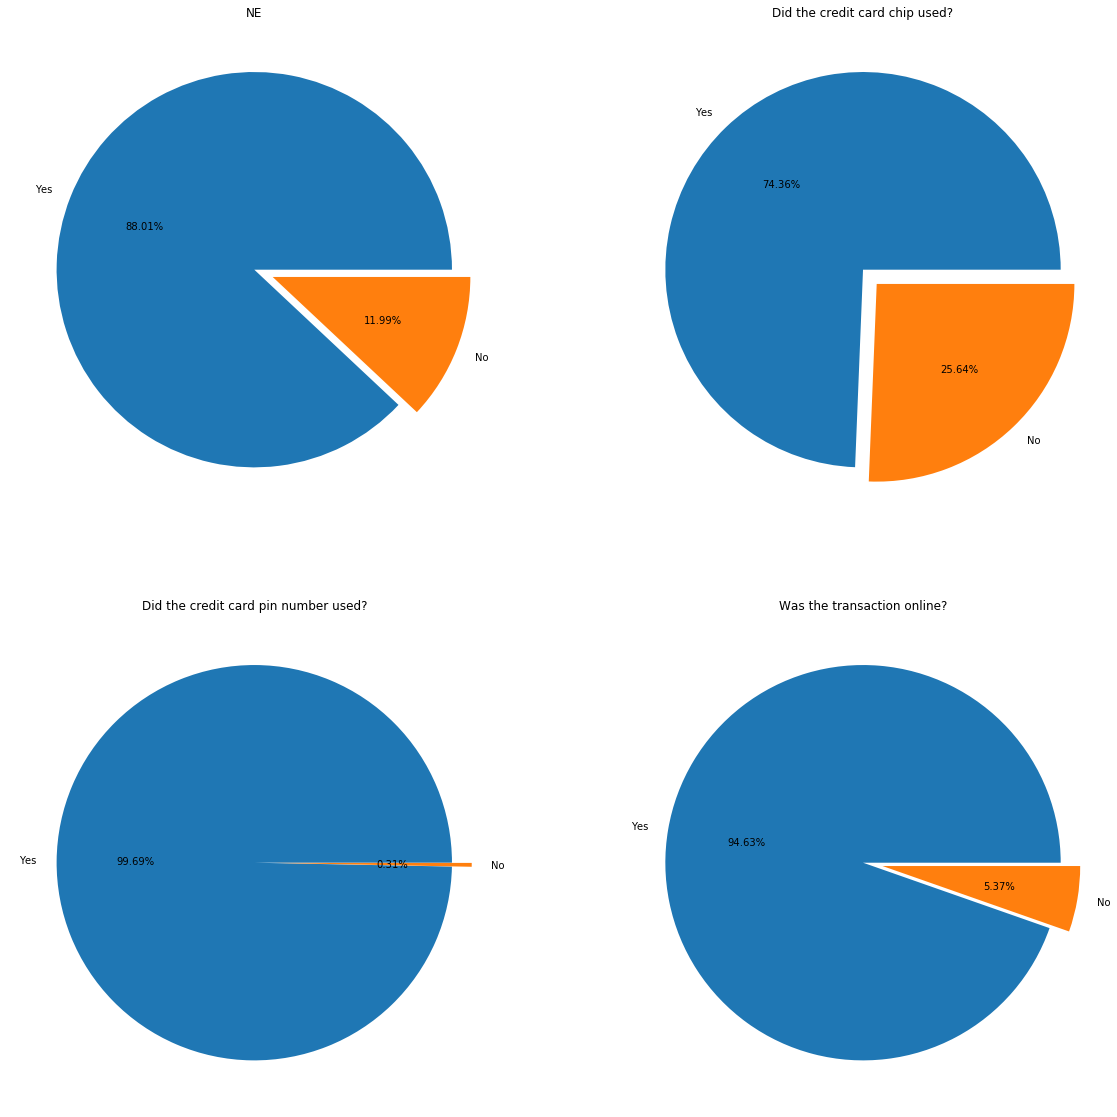

In [187]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(fraud_df["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("NE")

plt.subplot(2,2,2)
plt.pie(fraud_df["used_chip"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card chip used?")

plt.subplot(2,2,3)
plt.pie(fraud_df["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card pin number used?")

plt.subplot(2,2,4)
plt.pie(fraud_df["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the transaction online?")

**As mentioned earlier, there are significantly less fraud transaction data than non-fraud transaction data. It is possible to "fix" this by lowering non-fraud transactions or increasing fraud transactions. In this study, increasing fraud transaction will be used by SMOTE (Synthetic Minority Oversampling Technique)**

**Raw data also will be analyzed to better understand and compare these two outcomes.**

## Oversampling Technique and Model


### Splitting the features and target

In [188]:
x = df2.drop("fraud", axis = 1).values
y = df2["fraud"].values



## Oversampling

In [189]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=39)
non_fraud_over, fraud_over = smote.fit_resample(x, y)

In [190]:
non_fraud_over_df = pd.DataFrame(non_fraud_over, columns=["distance_from_home", "distance_from_last_transaction",
       "ratio_to_median_purchase_price", "repeat_retailer", "used_chip",
       "used_pin_number", "online_order"])
non_fraud_over_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.000000,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.000000,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.000000,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.000000,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.000000,0.0,1.0
...,...,...,...,...,...,...,...
1825189,0.865098,1.341068,4.173964,0.0,1.000000,0.0,1.0
1825190,4.803252,0.744443,6.650998,1.0,1.000000,0.0,1.0
1825191,12.536102,119.006991,4.094842,1.0,0.835731,0.0,1.0
1825192,389.245617,3.480952,0.922567,1.0,0.000000,0.0,1.0


In [191]:
non_fraud_over_df["fraud"] = fraud_over
df3 = non_fraud_over_df

In [192]:
print("df3 shape:", df3.shape)
print(df3.info())
df3.describe()

df3 shape: (1825194, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825194 entries, 0 to 1825193
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   distance_from_home              float64
 1   distance_from_last_transaction  float64
 2   ratio_to_median_purchase_price  float64
 3   repeat_retailer                 float64
 4   used_chip                       float64
 5   used_pin_number                 float64
 6   online_order                    float64
 7   fraud                           float64
dtypes: float64(8)
memory usage: 111.4 MB
None


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1825194.0
mean,4.442516e+01,8.458492e+00,3.694127e+00,8.809996e-01,3.055032e-01,5.625144e-02,7.852103e-01,0.5
std,1.018351e+02,3.750252e+01,4.693421e+00,3.232951e-01,4.555445e-01,2.296677e-01,4.080603e-01,0.5
min,4.874385e-03,1.182816e-04,4.399240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,4.142911e+00,3.112290e-01,6.944836e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.173429e+01,1.050549e+00,1.993814e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.5
75%,3.774807e+01,3.800466e+00,5.212519e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.0
max,1.063272e+04,1.185110e+04,2.678029e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


## Analyzing the Dataset

#### Splitting the dataset into train and test sets

In [193]:
from sklearn.model_selection import train_test_split

feature_columns = ["distance_from_home", "distance_from_last_transaction",
"ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"]

X_smote = df3[feature_columns]
y_smote = df3.fraud

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=39)

In [194]:
print(X_train_smote)

         distance_from_home  distance_from_last_transaction  \
839315           128.733444                        1.379909   
1626265           13.425438                       10.668039   
1690646            0.719136                        1.711302   
1680653            1.598907                        1.801605   
277528             9.097755                        1.261386   
...                     ...                             ...   
383892            10.399544                        0.629596   
1737792          100.963301                        0.451017   
203817             7.570151                        6.117175   
1269865           21.526340                        1.404967   
60809              2.556926                        0.038829   

         ratio_to_median_purchase_price  repeat_retailer  used_chip  \
839315                         0.261219              1.0   0.000000   
1626265                        4.092161              1.0   0.552015   
1690646                       

## Feature Scaling

In [195]:
print(X_train_smote)

         distance_from_home  distance_from_last_transaction  \
839315           128.733444                        1.379909   
1626265           13.425438                       10.668039   
1690646            0.719136                        1.711302   
1680653            1.598907                        1.801605   
277528             9.097755                        1.261386   
...                     ...                             ...   
383892            10.399544                        0.629596   
1737792          100.963301                        0.451017   
203817             7.570151                        6.117175   
1269865           21.526340                        1.404967   
60809              2.556926                        0.038829   

         ratio_to_median_purchase_price  repeat_retailer  used_chip  \
839315                         0.261219              1.0   0.000000   
1626265                        4.092161              1.0   0.552015   
1690646                       

## Training The Logistic Regression Model

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_smote, y_train_smote)

y_pred_logreg_smote = logreg.predict(X_test_smote)
print("Accuracy of logistic regression classifier on test set: {:.5f}".format(logreg.score(X_test_smote, y_test_smote)))

Accuracy of logistic regression classifier on test set: 0.94169


## Making The Confusion Matrix

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test_smote, y_pred_logreg_smote)
print(confusion_matrix)

<function confusion_matrix at 0x0000023901A917B8>


Text(87.0, 0.5, 'Reality')

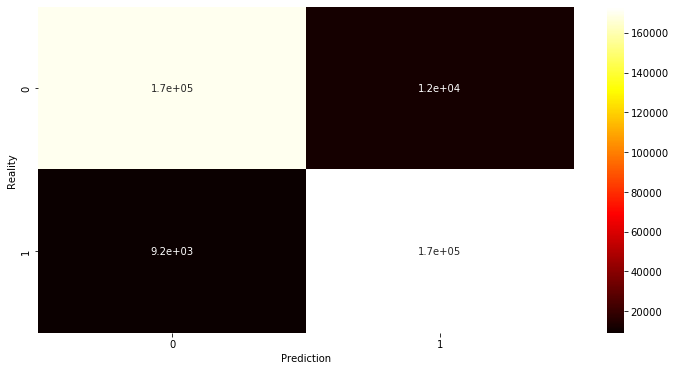

In [198]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_logreg, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred_logreg_smote)
print(cm)
accuracy_score(y_test_smote, y_pred_logreg_smote)

[[170559  12120]
 [  9167 173193]]


0.9416856828996354

## Using Decision Tree Model

In [200]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_smote,y_train_smote)

y_pred_dectree_smote = clf.predict(X_test_smote)

print("Accuracy:", metrics.accuracy_score(y_test_smote, y_pred_dectree_smote))

Accuracy: 0.999969866233471


In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix_decision = confusion_matrix(y_test_smote, y_pred_dectree_smote)
confusion_matrix_decision

array([[182676,      3],
       [     8, 182352]], dtype=int64)

In [202]:
models = ["Logistic Regression", "Decision Tree"]

false_positives = []

false_positives.append(confusion_matrix_logreg[0, 1])
false_positives.append(confusion_matrix_decision[0, 1])

false_negatives =[]

false_negatives.append(confusion_matrix_logreg[1, 0])
false_negatives.append(confusion_matrix_decision[1, 0])

accuracy = [logreg.score(X_test_smote, y_test_smote), metrics.accuracy_score(y_test_smote, y_pred_dectree_smote)]

In [203]:
model_comp = []

model_comp = pd.DataFrame(models, columns=["Model"])
model_comp["False Negatives"] = false_negatives
model_comp["False Positives"] = false_positives
model_comp["Accuracy"] = accuracy
model_comp

,Model,False Negatives,False Positives,Accuracy
0,Logistic Regression,9167,12120,0.941686
1,Decision Tree,8,3,0.999970


In [204]:
result = clf.predict(sc.transform([[10.6644737160167,1.56576908620166,4.88652084310755,1,0,0,1]]))
if result == 0:
    print("No Fraud")
elif result == 1:
    print("Fraud")

No Fraud


In [205]:
result = logreg.predict(sc.transform([[10.6644737160167,1.56576908620166,4.88652084310755,1,0,0,1]]))
if result == 0:
    print("No Fraud")
elif result == 1:
    print("Fraud")

No Fraud


### Saving the trained model

In [206]:
import pickle

In [207]:
filename = 'trained_fraud_model.sav'
pickle.dump(clf, open(filename, 'wb'))

### Loading the saved model

In [208]:
loaded_model = pickle.load(open('trained_fraud_model.sav', 'rb'))

In [210]:
input_data = (15.0190426448825,0.0238643075434555,0.503276157986172,1,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
result = loaded_model.predict(input_data_reshaped)
if result == 0:
    print("No Fraud")
elif result == 1:
    print("Fraud")

No Fraud
